In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
A=pd.read_csv('car_sales.csv',index_col=0)

In [3]:
A.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
A.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [5]:
f=A['Manufacturer'].value_counts()
f

Chevrolet        8
Ford             8
Dodge            6
Mazda            5
Pontiac          5
Nissan           4
Buick            4
Toyota           4
Oldsmobile       4
Volkswagen       4
Hyundai          4
Subaru           3
Honda            3
Lexus            2
Geo              2
Mitsubishi       2
Volvo            2
Mercury          2
Chrysler         2
Acura            2
Eagle            2
Mercedes-Benz    2
Cadillac         2
Lincoln          2
Audi             2
BMW              1
Infiniti         1
Suzuki           1
Saturn           1
Plymouth         1
Chrylser         1
Saab             1
Name: Manufacturer, dtype: int64

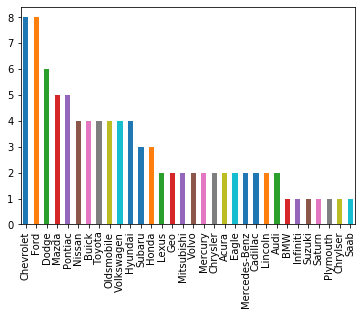

In [6]:
f.plot(kind='bar')

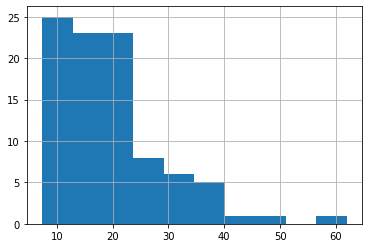

In [7]:
A['Price'].hist(bins=10)

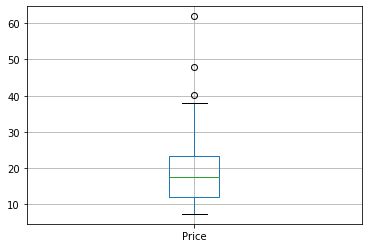

In [8]:
A.boxplot(column='Price')

In [9]:
A['Price'].describe()

count    93.000000
mean     19.509677
std       9.659430
min       7.400000
25%      12.200000
50%      17.700000
75%      23.300000
max      61.900000
Name: Price, dtype: float64

In [10]:
import copy
B=copy.deepcopy(A)

In [11]:
B['Price']=np.log(A['Price'])

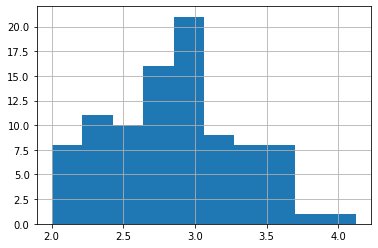

In [12]:
B['Price'].hist()

In [13]:
p=[9,15,4,5]
q=p #shallow copy (only reference of object is copied)

In [14]:
q[1]=100

In [15]:
q

[9, 100, 4, 5]

In [16]:
p

[9, 100, 4, 5]

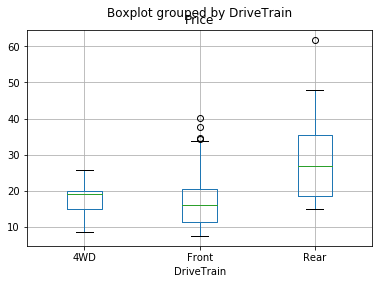

In [17]:
A.boxplot(column='Price',by='DriveTrain')

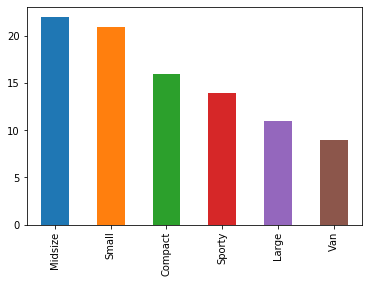

In [18]:
f1=A['Type'].value_counts()
f1.plot(kind='bar')

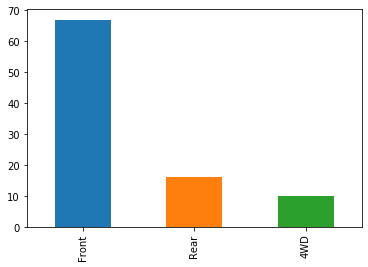

In [19]:
f2=A['DriveTrain'].value_counts()
f2.plot(kind='bar')

In [20]:
#stacked barplot or Crosstab
f3=pd.crosstab(A['Type'],A['DriveTrain'])
f3

DriveTrain,4WD,Front,Rear
Type,,,
Compact,1,13,2
Large,0,7,4
Midsize,0,17,5
Small,2,19,0
Sporty,2,7,5
Van,5,4,0


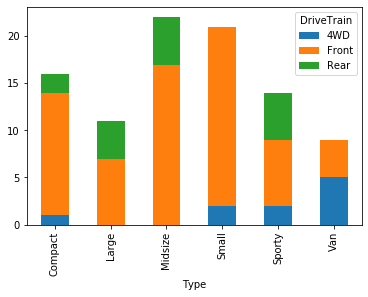

In [21]:
f3.plot(kind='bar',stacked=True)

In [22]:
1+3.32*np.log10(93) #optimal bin size selection with Sturges rule

7.535363389199064

(array([25., 48., 71., 79., 85., 90., 91., 92., 92., 93.]),
 array([ 7.4 , 12.85, 18.3 , 23.75, 29.2 , 34.65, 40.1 , 45.55, 51.  ,
        56.45, 61.9 ]),
 <a list of 1 Patch objects>)

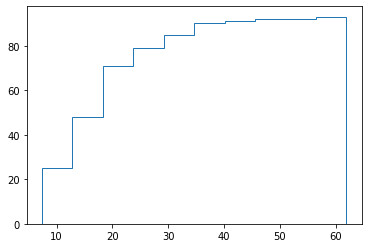

In [23]:
plt.hist(A['Price'],bins=10,histtype='step',cumulative=True) #ogive plot